In [232]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn
from shapely.geometry import Point
from geodatasets import get_path
from geopy import distance

In [233]:
df = pd.read_csv('weather.csv')

In [234]:
new_header = df.iloc[0] #grab the first row for the header
df = df[1:] #take the data less the header row
df.columns = new_header #set the header row as the df header

In [235]:
df.head()

,0,City,Country,Latitude,Longitude,MaxTemp1,MaxTemp2,MaxTemp3,MaxTemp4,MaxTemp5,...,Rainfall3,Rainfall4,Rainfall5,Rainfall6,Rainfall7,Rainfall8,Rainfall9,Rainfall10,Rainfall11,Rainfall12
1,1,Kabul,Afghanistan,34.55,69.22,4.5,5.5,12.5,19.2,24.4,...,67.9,71.9,23.4,1.0,6.2,1.6,1.7,3.7,18.6,21.6
2,2,Algiers,Algeria,36.7,3.22,16.7,17.4,19.2,20.9,23.9,...,55.0,58.4,41.9,8.5,4.5,8.2,28.3,58.8,89.6,91.0
3,3,Annaba,Algeria,36.9,7.76,16.3,16.8,18.6,20.5,23.7,...,61.2,64.1,38.3,14.0,3.1,8.2,37.5,64.8,98.4,110.8
4,4,Bechar,Algeria,31.61,-2.22,15.9,18.8,22.4,26.2,30.6,...,8.8,7.5,5.3,5.0,0.7,2.0,7.4,10.6,13.6,8.2
5,5,Biskra,Algeria,34.86,5.73,16.7,19.1,22.6,26.1,31.3,...,13.6,13.1,11.1,5.1,1.7,5.7,10.4,11.3,20.1,9.1


In [236]:
df = df.set_index(0)

In [237]:
df.dropna(subset=['MaxTemp1'], inplace=True)

In [238]:
gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude), crs="EPSG:4326"
)

In [239]:
gdf.head()

,City,Country,Latitude,Longitude,MaxTemp1,MaxTemp2,MaxTemp3,MaxTemp4,MaxTemp5,MaxTemp6,...,Rainfall4,Rainfall5,Rainfall6,Rainfall7,Rainfall8,Rainfall9,Rainfall10,Rainfall11,Rainfall12,geometry
0,,,,,,,,,,,,,,,,,,,,,
1,Kabul,Afghanistan,34.55,69.22,4.5,5.5,12.5,19.2,24.4,30.2,...,71.9,23.4,1.0,6.2,1.6,1.7,3.7,18.6,21.6,POINT (69.22000 34.55000)
2,Algiers,Algeria,36.7,3.22,16.7,17.4,19.2,20.9,23.9,28.2,...,58.4,41.9,8.5,4.5,8.2,28.3,58.8,89.6,91.0,POINT (3.22000 36.70000)
3,Annaba,Algeria,36.9,7.76,16.3,16.8,18.6,20.5,23.7,27.5,...,64.1,38.3,14.0,3.1,8.2,37.5,64.8,98.4,110.8,POINT (7.76000 36.90000)
4,Bechar,Algeria,31.61,-2.22,15.9,18.8,22.4,26.2,30.6,36.5,...,7.5,5.3,5.0,0.7,2.0,7.4,10.6,13.6,8.2,POINT (-2.22000 31.61000)
5,Biskra,Algeria,34.86,5.73,16.7,19.1,22.6,26.1,31.3,37.0,...,13.1,11.1,5.1,1.7,5.7,10.4,11.3,20.1,9.1,POINT (5.73000 34.86000)


In [240]:
world = gpd.read_file(get_path("naturalearth.land"))

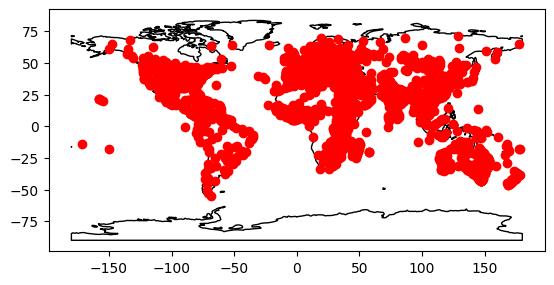

In [241]:
ax = world.plot(color="white", edgecolor="black")
gdf.plot(ax=ax, color="red")
plt.show()

In [242]:
type(gdf)

geopandas.geodataframe.GeoDataFrame

In [243]:
coords = (float(gdf.iloc[0]['Latitude']), float(gdf.iloc[0]['Longitude']))

In [244]:
def distance_from_fixed_point(fixpt, x, y):
    q = (float(x), float(y))
    r = (distance.geodesic(fixpt, q).km)
    return r

In [245]:
gdf_copy = gdf

In [246]:
gdf_copy['dist_from_kabul'] = gdf_copy.apply(lambda row: distance_from_fixed_point(coords, row.Latitude, row.Longitude), axis=1)

In [247]:
gdf_copy.sort_values(by=['dist_from_kabul'])

,City,Country,Latitude,Longitude,MaxTemp1,MaxTemp2,MaxTemp3,MaxTemp4,MaxTemp5,MaxTemp6,...,Rainfall5,Rainfall6,Rainfall7,Rainfall8,Rainfall9,Rainfall10,Rainfall11,Rainfall12,geometry,dist_from_kabul
0,,,,,,,,,,,,,,,,,,,,,
1,Kabul,Afghanistan,34.55,69.22,4.5,5.5,12.5,19.2,24.4,30.2,...,23.4,1.0,6.2,1.6,1.7,3.7,18.6,21.6,POINT (69.22000 34.55000),0.000000
1389,Peshawar,Pakistan,34.0,71.53,18.6,20.1,24.4,30.6,36.7,40.1,...,22.6,20.5,58.4,77.1,29.4,22.1,13.9,20.0,POINT (71.53000 34.00000),221.288705
2169,Termez,Uzbekistan,37.23,67.27,9.3,12.1,18.3,25.8,32.2,37.4,...,9.3,0.8,0.1,0.0,0.1,3.3,8.8,17.4,POINT (67.27000 37.23000),345.555296
1811,Kurgan-Tube,Tajikistan,37.82,68.78,10.8,10.8,17.2,24.3,30.4,36.1,...,23.8,3.9,0.3,0.1,0.6,8.7,21.9,33.8,POINT (68.78000 37.82000),364.998194
1382,Islamabad,Pakistan,33.716667,73.1,17.9,19.8,24.5,30.5,36.0,38.4,...,35.4,75.4,311.1,337.5,109.2,31.7,14.5,36.4,POINT (73.10000 33.71667),369.608587
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19,El Calafate,Argentina,-50.28,-72.05,4.7,6.6,11.0,13.2,15.4,17.9,...,7.8,4.4,8.0,15.1,21.3,23.3,15.9,9.1,POINT (-72.05000 -50.28000),16437.479597
16,Bariloche,Argentina,-41.15,-71.17,6.7,8.3,11.5,14.8,17.9,20.5,...,29.3,23.4,20.0,15.3,35.2,58.9,130.1,170.1,POINT (-71.17000 -41.15000),16492.426878
498,Coyhaique,Chile,-45.59389,-72.10861,5.6,8.2,11.3,13.8,15.8,17.8,...,56.7,59.9,56.8,44.1,70.9,95.2,113.6,141.5,POINT (-72.10861 -45.59389),16540.859380


In [248]:
gdf_copy = gdf_copy.loc[gdf_copy['dist_from_kabul'] > 5000]

In [249]:
z = gdf_copy.iloc[-2].to_numpy()[4:40].astype(float)

In [250]:
z

array([ 20. ,  22.6,  26.2,  27.3,  26.9,  25.8,  25.9,  25.3,  25.5,
        24.3,  22.4,  20.2,   4.8,   6.3,   9.5,  12.4,  14.1,  15.1,
        15.3,  15.1,  13.9,  11.4,   7.8,   5.1,   4.5,   4.7,   9.2,
        41. , 105.8, 168.2, 165.5, 147.9,  78.8,  36.8,  12.2,   6.6])

In [251]:
y = gdf_copy.iloc[0].to_numpy()[4:40].astype(float)

In [252]:
np.pad(y,(0,12), 'constant')

array([16.7, 17.4, 19.2, 20.9, 23.9, 28.2, 31.2, 32.2, 29.6, 25.9, 20.8,
       17.9,  5.5,  5.9,  7.1,  8.8, 12.3, 16.1, 18.9, 19.8, 17.6, 14.2,
        9.8,  7.2, 81.4, 72.7, 55. , 58.4, 41.9,  8.5,  4.5,  8.2, 28.3,
       58.8, 89.6, 91. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ])

In [253]:
any(np.isnan(y))

False

In [254]:
np.linalg.norm(y-z)

323.17942384997224

In [255]:
def fixpt_creator(k, desert):
    #attempts to control for dry desert locations by assuming near-zero rainfall
    if desert:
        y1 = k.to_numpy()[4:28].astype(float)
        y = np.pad(y, (0,12), 'constant')
    else:
        y = k.to_numpy()[4:40].astype(float)
    return y


In [256]:
def wthr_distance(y, x):
    z = x.to_numpy()[4:40].astype(float)
    wthrdist = np.linalg.norm(y-z)
    return wthrdist

In [257]:
kabul = fixpt_creator(gdf_copy.iloc[0], False)

In [258]:
gdf_copy = gdf_copy.loc[gdf_copy['dist_from_kabul'] != 0]

In [259]:
gdf_copy

,City,Country,Latitude,Longitude,MaxTemp1,MaxTemp2,MaxTemp3,MaxTemp4,MaxTemp5,MaxTemp6,...,Rainfall5,Rainfall6,Rainfall7,Rainfall8,Rainfall9,Rainfall10,Rainfall11,Rainfall12,geometry,dist_from_kabul
0,,,,,,,,,,,,,,,,,,,,,
2,Algiers,Algeria,36.7,3.22,16.7,17.4,19.2,20.9,23.9,28.2,...,41.9,8.5,4.5,8.2,28.3,58.8,89.6,91.0,POINT (3.22000 36.70000),5860.783338
3,Annaba,Algeria,36.9,7.76,16.3,16.8,18.6,20.5,23.7,27.5,...,38.3,14.0,3.1,8.2,37.5,64.8,98.4,110.8,POINT (7.76000 36.90000),5468.099935
4,Bechar,Algeria,31.61,-2.22,15.9,18.8,22.4,26.2,30.6,36.5,...,5.3,5.0,0.7,2.0,7.4,10.6,13.6,8.2,POINT (-2.22000 31.61000),6533.385737
5,Biskra,Algeria,34.86,5.73,16.7,19.1,22.6,26.1,31.3,37.0,...,11.1,5.1,1.7,5.7,10.4,11.3,20.1,9.1,POINT (5.73000 34.86000),5712.181818
6,Constantine,Algeria,36.36,6.61,11.7,13.2,15.9,18.5,23.9,29.8,...,44.7,19.5,7.1,10.8,35.8,38.2,57.7,80.8,POINT (6.61000 36.36000),5584.065107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2233,Mount Darwin,Zimbabwe,-16.77,31.57,23.8,26.2,29.3,31.5,30.7,28.8,...,64.2,183.4,219.0,185.9,86.7,28.9,5.2,0.9,POINT (31.57000 -16.77000),6937.901022
2234,Mutare,Zimbabwe,-18.97,32.65,21.2,23.2,26.1,27.0,27.5,27.1,...,86.4,167.0,153.5,164.5,88.4,31.8,12.4,8.9,POINT (32.65000 -18.97000),7075.769461
2235,Plumtree,Zimbabwe,-20.48,27.8,21.6,24.5,28.2,29.7,29.0,28.0,...,90.7,118.8,120.2,114.0,70.0,35.9,6.8,2.7,POINT (27.80000 -20.48000),7503.125002


In [260]:
gdf_copy['weather_dist'] = gdf_copy.apply(lambda row: wthr_distance(kabul, row), axis=1)

In [261]:
gdf_copy.sort_values(by=['weather_dist'])

,City,Country,Latitude,Longitude,MaxTemp1,MaxTemp2,MaxTemp3,MaxTemp4,MaxTemp5,MaxTemp6,...,Rainfall6,Rainfall7,Rainfall8,Rainfall9,Rainfall10,Rainfall11,Rainfall12,geometry,dist_from_kabul,weather_dist
0,,,,,,,,,,,,,,,,,,,,,
2,Algiers,Algeria,36.7,3.22,16.7,17.4,19.2,20.9,23.9,28.2,...,8.5,4.5,8.2,28.3,58.8,89.6,91.0,POINT (3.22000 36.70000),5860.783338,0.000000
1438,Beja,Portugal,38.02,-7.87,13.9,15.3,18.3,19.8,23.4,28.7,...,17.6,2.9,4.0,24.7,63.3,71.8,100.6,POINT (-7.87000 38.02000),6728.905901,31.903762
3,Annaba,Algeria,36.9,7.76,16.3,16.8,18.6,20.5,23.7,27.5,...,14.0,3.1,8.2,37.5,64.8,98.4,110.8,POINT (7.76000 36.90000),5468.099935,32.034981
1683,Cordoba,Spain,37.88,-4.78,14.9,17.1,21.1,22.8,27.0,32.7,...,12.3,2.5,5.0,30.6,75.7,93.7,104.1,POINT (-4.78000 37.88000),6482.786708,35.097008
1686,Ecija,Spain,37.540556,-5.075278,15.1,17.2,21.0,22.6,26.7,32.2,...,9.9,2.4,7.8,27.0,66.3,87.0,100.8,POINT (-5.07528 37.54056),6520.799770,35.121646
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,Milford Sound,New Zealand,-44.673,167.924,8.9,11.2,13.3,15.1,16.8,18.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (167.92400 -44.67300),13238.535922,NaN
1311,Oamaru,New Zealand,-45.1,170.95,10.9,11.9,13.8,15.3,16.8,17.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (170.95000 -45.10000),13479.366169,NaN
1995,"Frankfort, Kentucky",United States of America,38.20091,-84.87328,5.3,7.8,13.2,19.2,24.0,28.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-84.87328 38.20091),11519.522775,NaN
